In [24]:
import sqlalchemy
from sqlalchemy import create_engine,func,desc,inspect,distinct,asc
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

#from scipy.stats import sem


In [25]:
#initating the engine
engine=create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
engine.execute("Select * from measurement").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [27]:
engine.execute("Select * from station").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [28]:
#inspecting the tables & checking the columns
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [29]:
#field names of the tables
cols=inspector.get_columns('station')
for col in cols:
    print(col['name'],col['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [30]:
cols=inspector.get_columns('measurement')
for col in cols:
    print(col['name'],col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [31]:
# reflect using the orm & save the reference to the tables
Base=automap_base()
Base.prepare(engine,reflect=True)
Measurement=Base.classes.measurement
Station=Base.classes.station

In [32]:
#create a session with the engine
session =Session(engine)

In [33]:
# to get the latest date
latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(latest_date[0])

2017-08-23


In [34]:
# info for flask Html file
start_date=session.query(Measurement.date).order_by(Measurement.date.asc()).first()

In [35]:
# create query with date and precipitation for last 1 yr
sel=[Measurement.date,Measurement.prcp.label("precipitation")]
query_date=dt.date(2017,8,23)-dt.timedelta(days=365)
prcp_list=session.query(*sel).filter(Measurement.date  >= query_date).filter(Measurement.date <= latest_date[0]).order_by(Measurement.date)
prcp_list.all()


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [36]:
df=pd.read_sql_query(prcp_list.statement,session.bind.engine)
df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


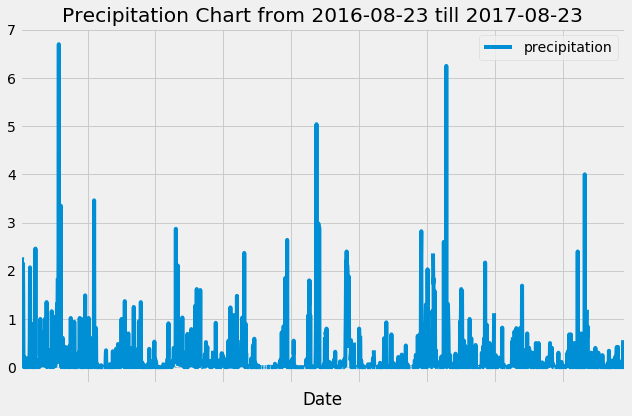

In [37]:
fig1=df.set_index("date").plot(figsize=(9,6))
fig1.set_xticklabels("")
fig1.set_xlabel('Date')
fig1.set_title(f"Precipitation Chart from {query_date} till {latest_date[0]}")
plt.tight_layout()
plt.show()


In [38]:
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [39]:
# No of stations in the dataset of Station
session.query(func.count(distinct(Measurement.station))).all()


[(9)]

In [40]:
# Query for the Most active station & unpack it in first_station
sel=[Measurement.station,func.count(Measurement.station)]
record=session.query(*sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
first_station,count=[rec for rec in record]
print(first_station,count)

USC00519281 2772


In [41]:
# Calculate Max min and avg temp of the Most active station
sel=[func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)]
session.query(*sel).filter(Measurement.station==first_station).all()

[(85.0, 54.0, 71.66378066378067)]

In [42]:
#query to get the station with highest observations
station_name,_=session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()

In [43]:
#query to get the latest date for the station with highest temp obsv
latest_dt=session.query(Measurement.date).filter(Measurement.station==station_name).order_by(Measurement.date.desc()).first()


In [44]:
#Query to get year old data for this station 
query1=dt.date(2017,8,18)-dt.timedelta(days=365)
sel=[Measurement.date,Measurement.tobs.label("temperature")]
temp_list=session.query(*sel).filter(Measurement.station==station_name).filter(Measurement.date>query1).filter(Measurement.date <latest_dt[0])
temp_list.all()

[('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-

In [45]:
#create dataframe
df1=pd.read_sql_query(temp_list.statement,session.bind.engine)
df1.head()


,date,temperature
0,2016-08-19,79.0
1,2016-08-20,81.0
2,2016-08-21,79.0
3,2016-08-22,78.0
4,2016-08-23,77.0


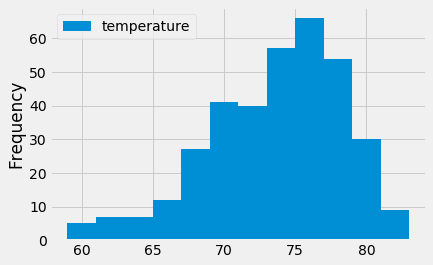

In [46]:
#hist with bins of 12
df1.plot(kind='hist',bins=12)

In [47]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    sel=[func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [48]:
#my trip dates
trip_start='2019-06-01'
trip_end='2019-06-08'
trip_result=calc_temps('2017-06-01', '2017-06-08')

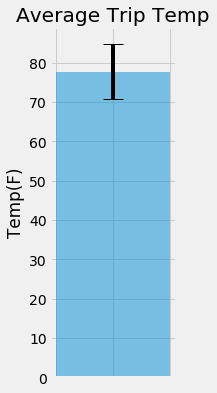

In [49]:
# unpack the agg values of the temp
tmin,tavg,tmax=np.ravel(trip_result)

er=tmax-tmin

x=np.arange(0,1)
y=tavg
fig = plt.figure(figsize=(2,6))
ax=fig.subplots()
ax.bar(x,y,yerr=er,align='center',alpha=.5,capsize=10,width=.1)
ax.set_ylabel("Temp(F)")
ax.set_title("Average Trip Temp")
ax.set_xticklabels("")
ax.yaxis.grid(True)
plt.show()


In [50]:
# rainfall per station
trip_start_last="2017-06-01"
trip_end_last="2017-06-08"
sel=[Measurement.station,Station.name,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation]

print(session.query(*sel).filter(Measurement.date>=trip_start_last).filter(Measurement.date<=trip_end_last).\
    filter(Measurement.station==Station.station).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all())

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 0.85, 21.3331, -157.8025, 152.4), ('USC00513117', 'KANEOHE 838.1, HI US', 0.5, 21.4234, -157.8015, 14.6), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 0.39, 21.5213, -157.8374, 7.0), ('USC00519281', 'WAIHEE 837.5, HI US', 0.35, 21.45167, -157.84888999999998, 32.9), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 0.15, 21.33556, -157.71139, 19.5), ('USC00519397', 'WAIKIKI 717.2, HI US', 0.02, 21.2716, -157.8168, 3.0), ('USC00517948', 'PEARL CITY, HI US', None, 21.3934, -157.9751, 11.9)]


In [51]:
#function to calculate the daily normals
def daily_normals(date):
    sel=[func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)]
    normals=session.query(* sel).filter(func.strftime("%m-%d",Measurement.date)==date).all()
    return normals
#testing daily_normals
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [52]:
# list for the trip dates range and another for storing the aggregate temps of the trip dates
trip_normals_list=[]
trip_date_range=[]
yt_1,mt_1,dt_1=trip_end.split("-")
yt_2,mt_2,dt_2=trip_start.split("-")
no_of_days=int(dt_1)-int(dt_2)
print(no_of_days)

7


In [53]:
# loop for creating the trip dates & agg temp Data list
for val in range(no_of_days+1):
    new_date=mt_1+"-"+dt_2
    trip_date_range.append(yt_2+"-"+mt_2+"-"+dt_2)
#converting the nested lists to the list of tuples
    trip_normals_list.append(tuple(np.ravel(daily_normals(new_date))))
# to make the date 2 digit
    dt_2=str(int(dt_2)+1).zfill(2)

In [54]:
print(trip_normals_list)

[(64.0, 74.6140350877193, 81.0), (65.0, 74.4, 81.0), (65.0, 74.03448275862068, 80.0), (65.0, 73.81818181818181, 81.0), (68.0, 74.85454545454546, 81.0), (70.0, 75.17543859649123, 80.0), (68.0, 75.07142857142857, 81.0), (70.0, 75.58620689655173, 81.0)]


In [55]:
print(trip_date_range)



['2019-06-01', '2019-06-02', '2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06', '2019-06-07', '2019-06-08']


In [56]:
df1=pd.DataFrame(trip_normals_list,columns=["min_temp","avg_temp","max_temp"])
df1.head()

,min_temp,avg_temp,max_temp
0,64.0,74.614035,81.0
1,65.0,74.400000,81.0
2,65.0,74.034483,80.0
3,65.0,73.818182,81.0
4,68.0,74.854545,81.0


In [57]:
df2=pd.DataFrame({'date':trip_date_range})
df2


,date
0,2019-06-01
1,2019-06-02
2,2019-06-03
3,2019-06-04
4,2019-06-05
5,2019-06-06
6,2019-06-07
7,2019-06-08


In [77]:
df=pd.concat([df2,df1],axis=1)
df=df.set_index("date")

In [78]:
df.head()

,min_temp,avg_temp,max_temp
date,,,
2019-06-01,64.0,74.614035,81.0
2019-06-02,65.0,74.400000,81.0
2019-06-03,65.0,74.034483,80.0
2019-06-04,65.0,73.818182,81.0
2019-06-05,68.0,74.854545,81.0


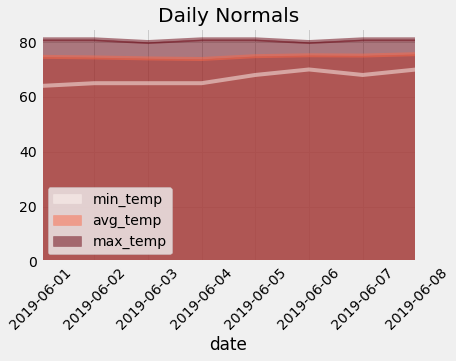

In [80]:
#fig1=plt.stackplot(df.date,df["min_temp"],df["avg_temp"],df["max_temp"],colors=['#377EB8','#55BA87','#7E1137'],stacked='False')

fig1=df.plot(kind='area', stacked=False, alpha=0.5, colormap='Reds',title='Daily Normals',rot=45)
